1. Import required modules

In [1]:
import pandas as pd
from import_data import load_input_tables 
from mohrs_3D_v2 import mohrs_3D_v2
from ppfail_MC import ppfail_MC
from plot_fault_map import plot_fault_map

2. Load input tables and helper functions

In [2]:
# Load tables
params_row, faults_df = load_input_tables("Params Input Table.csv", "Faults Input Table.csv")

# Helper function to initialize parameters
def get_param(name):
    value = params_row.get(name)
    return value if pd.notna(value) else faults_df[name].values

3. Initialize Data

In [3]:
# Initialize data
center_X = get_param("center_X")
center_Y = get_param("center_Y")
length = get_param("length")
ref_mu = get_param("ref_mu")
name = get_param("name")
Sv_grad = get_param("Sv_grad")
Sv_grad_dist = get_param("Sv_grad_dist")
Sv_grad_param = get_param("Sv_grad_param")
mu = get_param("mu")
mu_dist = get_param("mu_dist")
mu_param = get_param("mu_param")
strike = get_param("strike")
strike_dist = get_param("strike_dist")
strike_param = get_param("strike_param")
dip = get_param("dip")
dip_dist = get_param("dip_dist")
dip_param = get_param("dip_param")
Pp = get_param("Pp")
Pp_dist = get_param("Pp_dist")
Pp_param = get_param("Pp_param")
SHmax_or = get_param("SHmax_or")
SHmax_or_dist = get_param("SHmax_or_dist")
SHmax_or_param = get_param("SHmax_or_param")
Aphi = get_param("Aphi")
Aphi_dist = get_param("Aphi_dist")
Aphi_param = get_param("Aphi_param")
SHmax_mag = get_param("SHmax_mag")
SHmax_mag_dist = get_param("SHmax_mag_dist")
SHmax_mag_param = get_param("SHmax_mag_param")
Shmin_mag = get_param("Shmin_mag")
Shmin_mag_dist = get_param("Shmin_mag_dist")
Shmin_mag_param = get_param("Shmin_mag_param")

variables = {
    "Sv_grad": Sv_grad,
    "mu": mu,
    "strike": strike,
    "dip": dip,
    "ref_mu": ref_mu,
    "Pp": Pp,
    "SHmax_or": SHmax_or,
    "Aphi": Aphi,
    "SHmax_mag": SHmax_mag,
    "Shmin_mag": Shmin_mag,
    "name": name
}

dist_params = {
    "Sv_grad_dist": Sv_grad_dist,
    "Sv_grad_param": Sv_grad_param,
    "mu_dist": mu_dist,
    "mu_param": mu_param,
    "strike_dist": strike_dist,
    "strike_param": strike_param,
    "dip_dist": dip_dist,
    "dip_param": dip_param,
    "Pp_dist": Pp_dist,
    "Pp_param": Pp_param,
    "SHmax_or_dist": SHmax_or_dist,
    "SHmax_or_param": SHmax_or_param,
    "Aphi_dist": Aphi_dist,
    "Aphi_param": Aphi_param,
    "SHmax_mag_dist": SHmax_mag_dist,
    "SHmax_mag_param": SHmax_mag_param,
    "Shmin_mag_dist": Shmin_mag_dist,
    "Shmin_mag_param": Shmin_mag_param
}

4. Deterministic Analysis Results

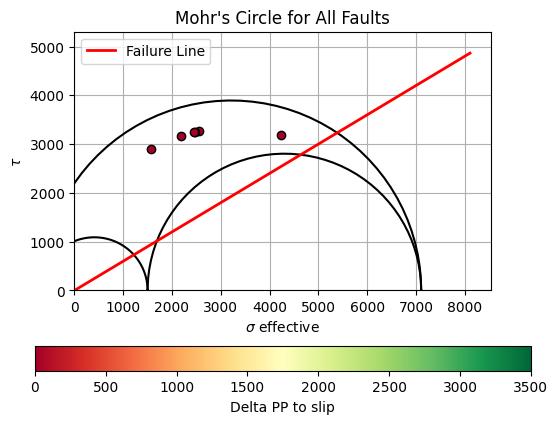


Fault 1:
Pore pressure to failure for fault (ppfail): -2895.873
Coulomb failure function (cff): 1737.524
Shear capacity utilization (scu): 2.132
Effective normal stress projected onto fault (sig_fault): 2558.882
Effective shear stress projected onto fault (tau_fault): 3272.853

Fault 2:
Pore pressure to failure for fault (ppfail): -2955.164
Coulomb failure function (cff): 1773.099
Shear capacity utilization (scu): 2.198
Effective normal stress projected onto fault (sig_fault): 2466.548
Effective shear stress projected onto fault (tau_fault): 3253.027

Fault 3:
Pore pressure to failure for fault (ppfail): -3111.281
Coulomb failure function (cff): 1866.769
Shear capacity utilization (scu): 2.430
Effective normal stress projected onto fault (sig_fault): 2175.945
Effective shear stress projected onto fault (tau_fault): 3172.336

Fault 4:
Pore pressure to failure for fault (ppfail): -2967.784
Coulomb failure function (cff): 1780.670
Shear capacity utilization (scu): 2.213
Effective normal 

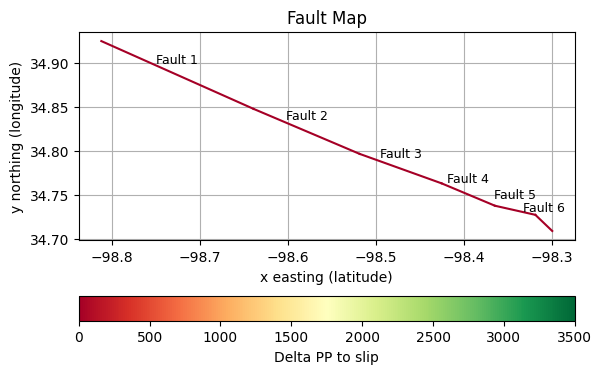

In [4]:
# Call mohrs_3D_v2 and plot_fault_map functions
ppfail = mohrs_3D_v2(strike, dip, mu, SHmax_or, Pp, Aphi, Sv_grad, SHmax_mag, Shmin_mag, ref_mu, name, plot=True, data=True)
plot_fault_map(center_X, center_Y, length, strike, ppfail, name)

5. Probabilistic Analysis Results

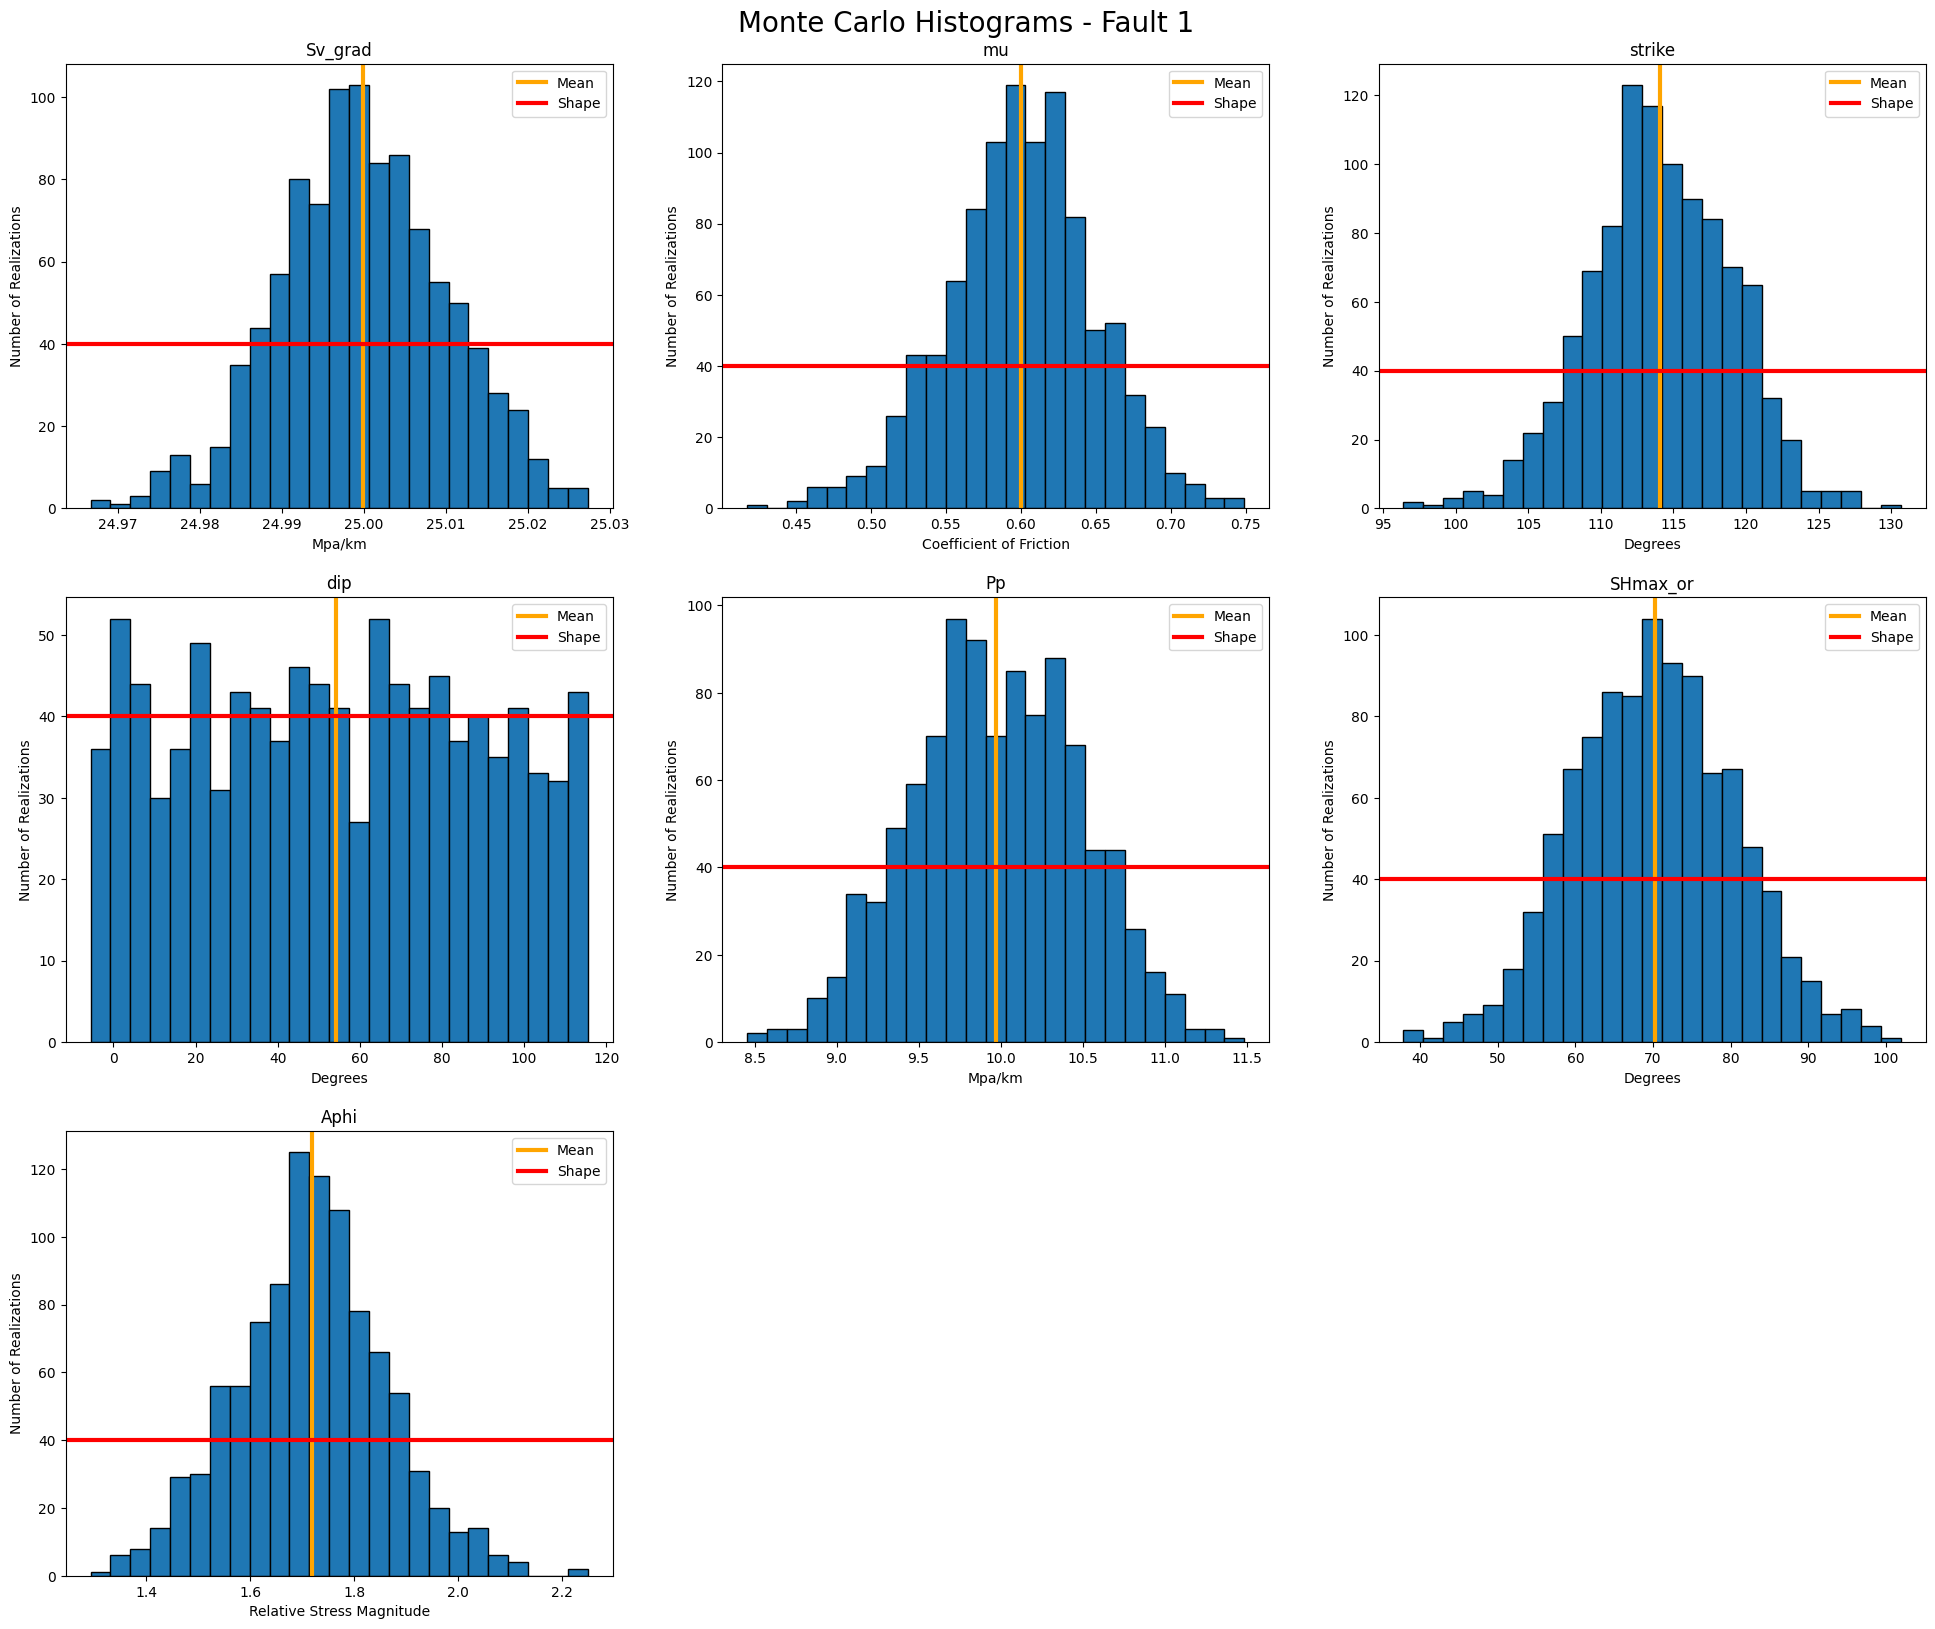

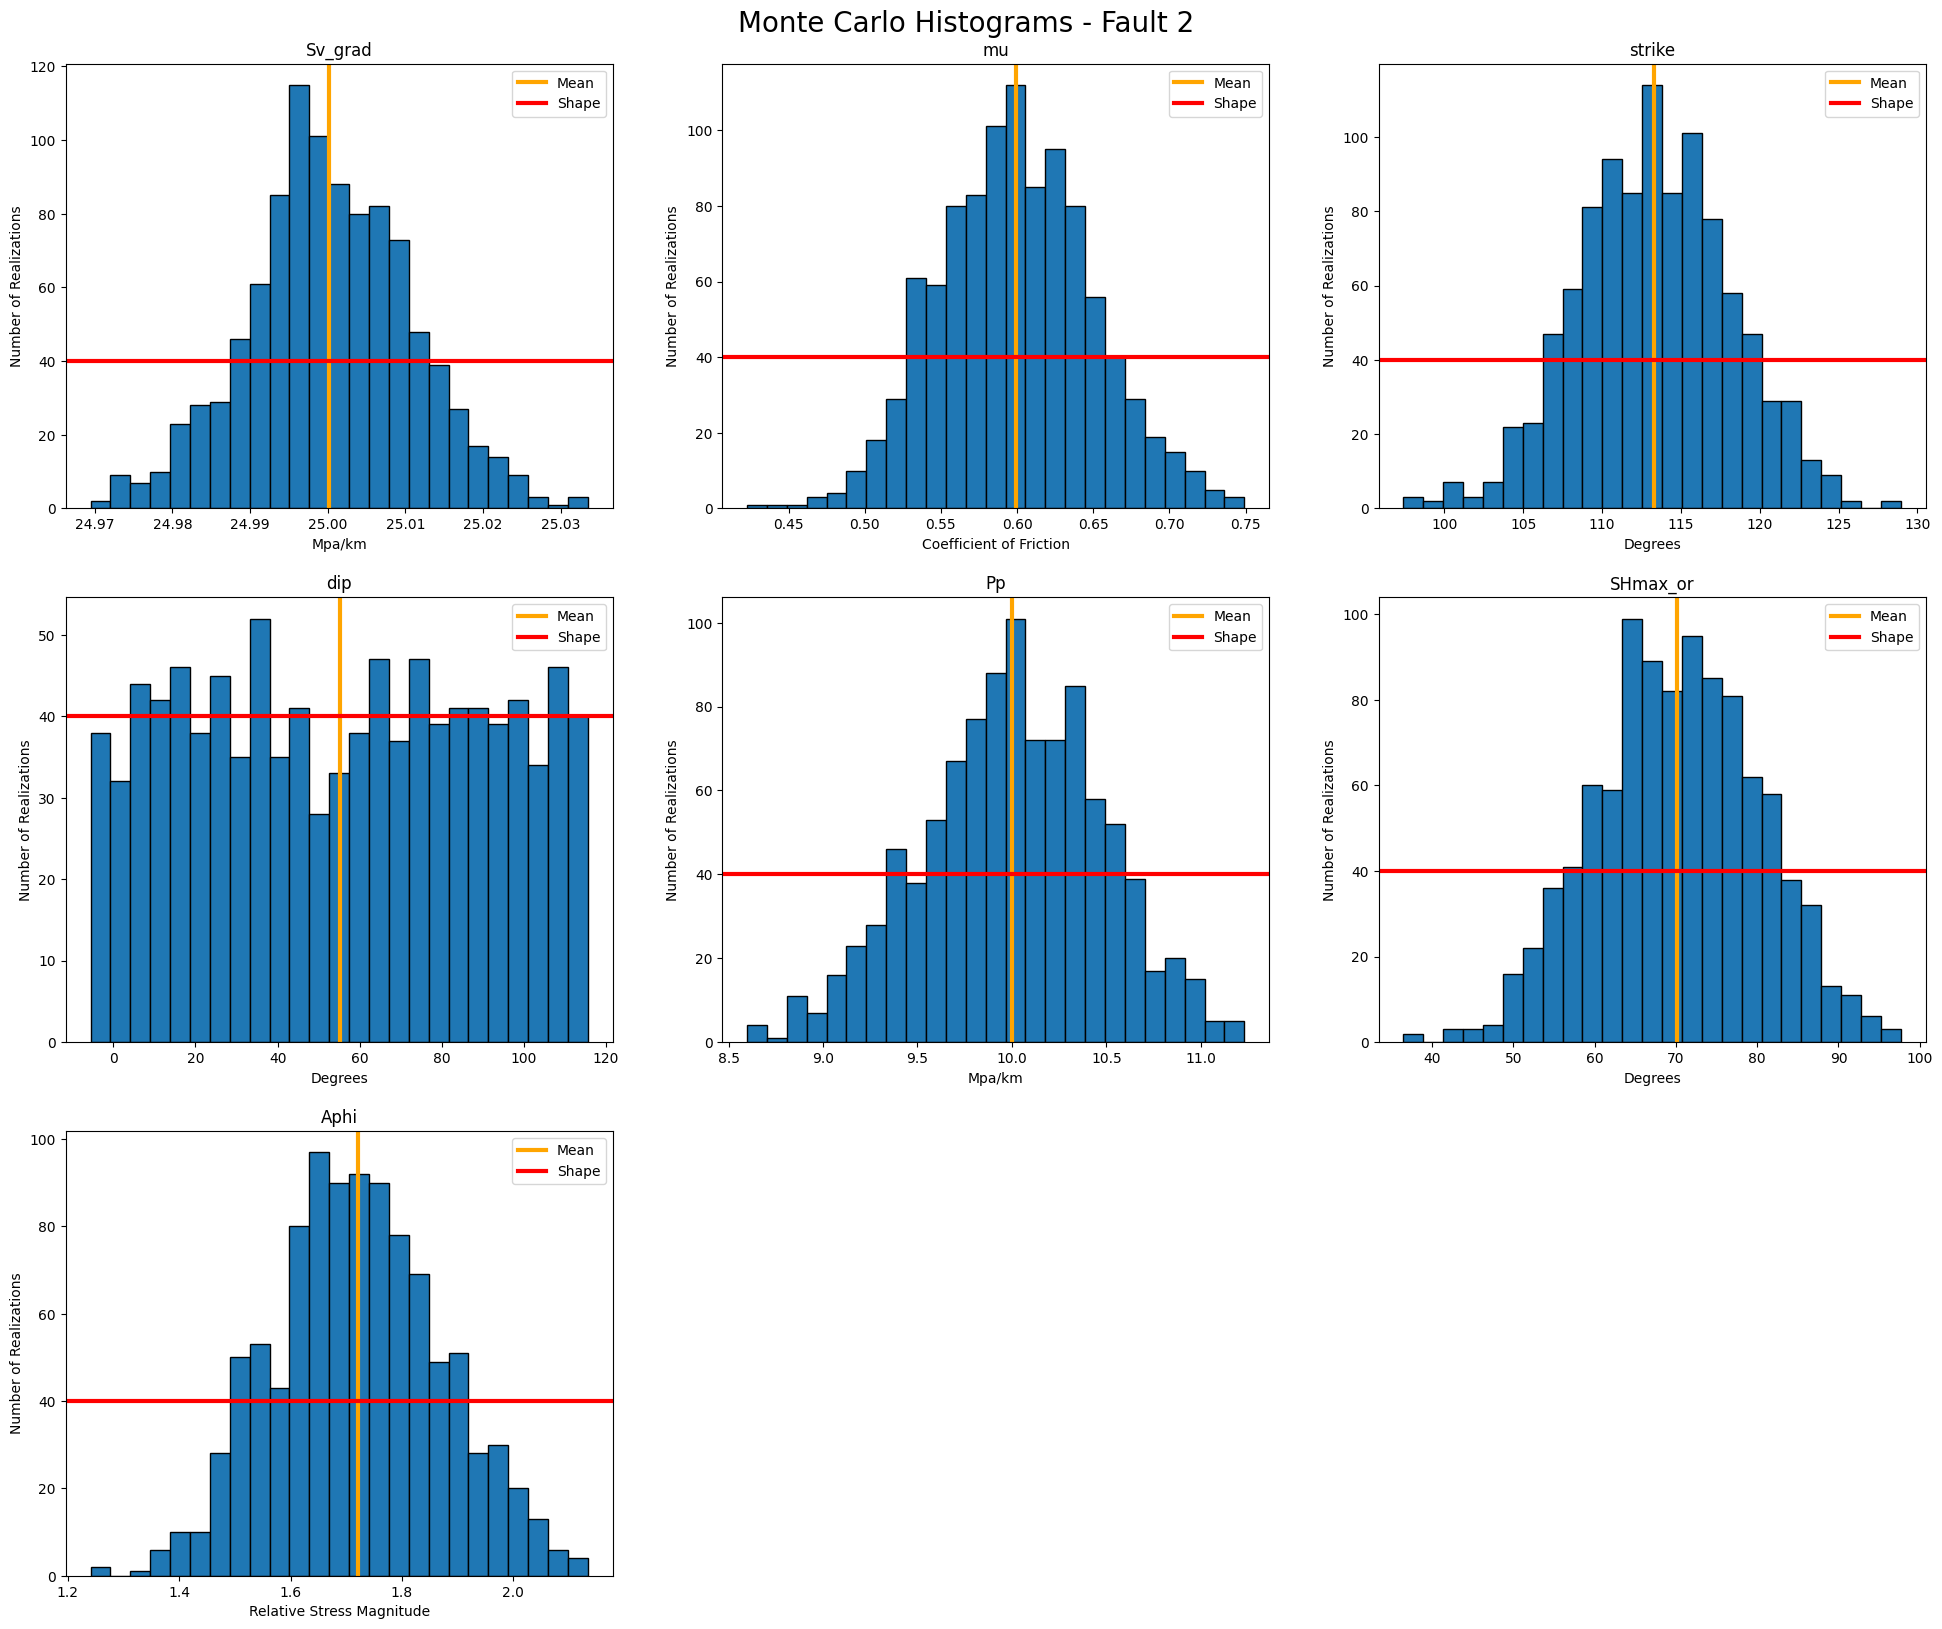

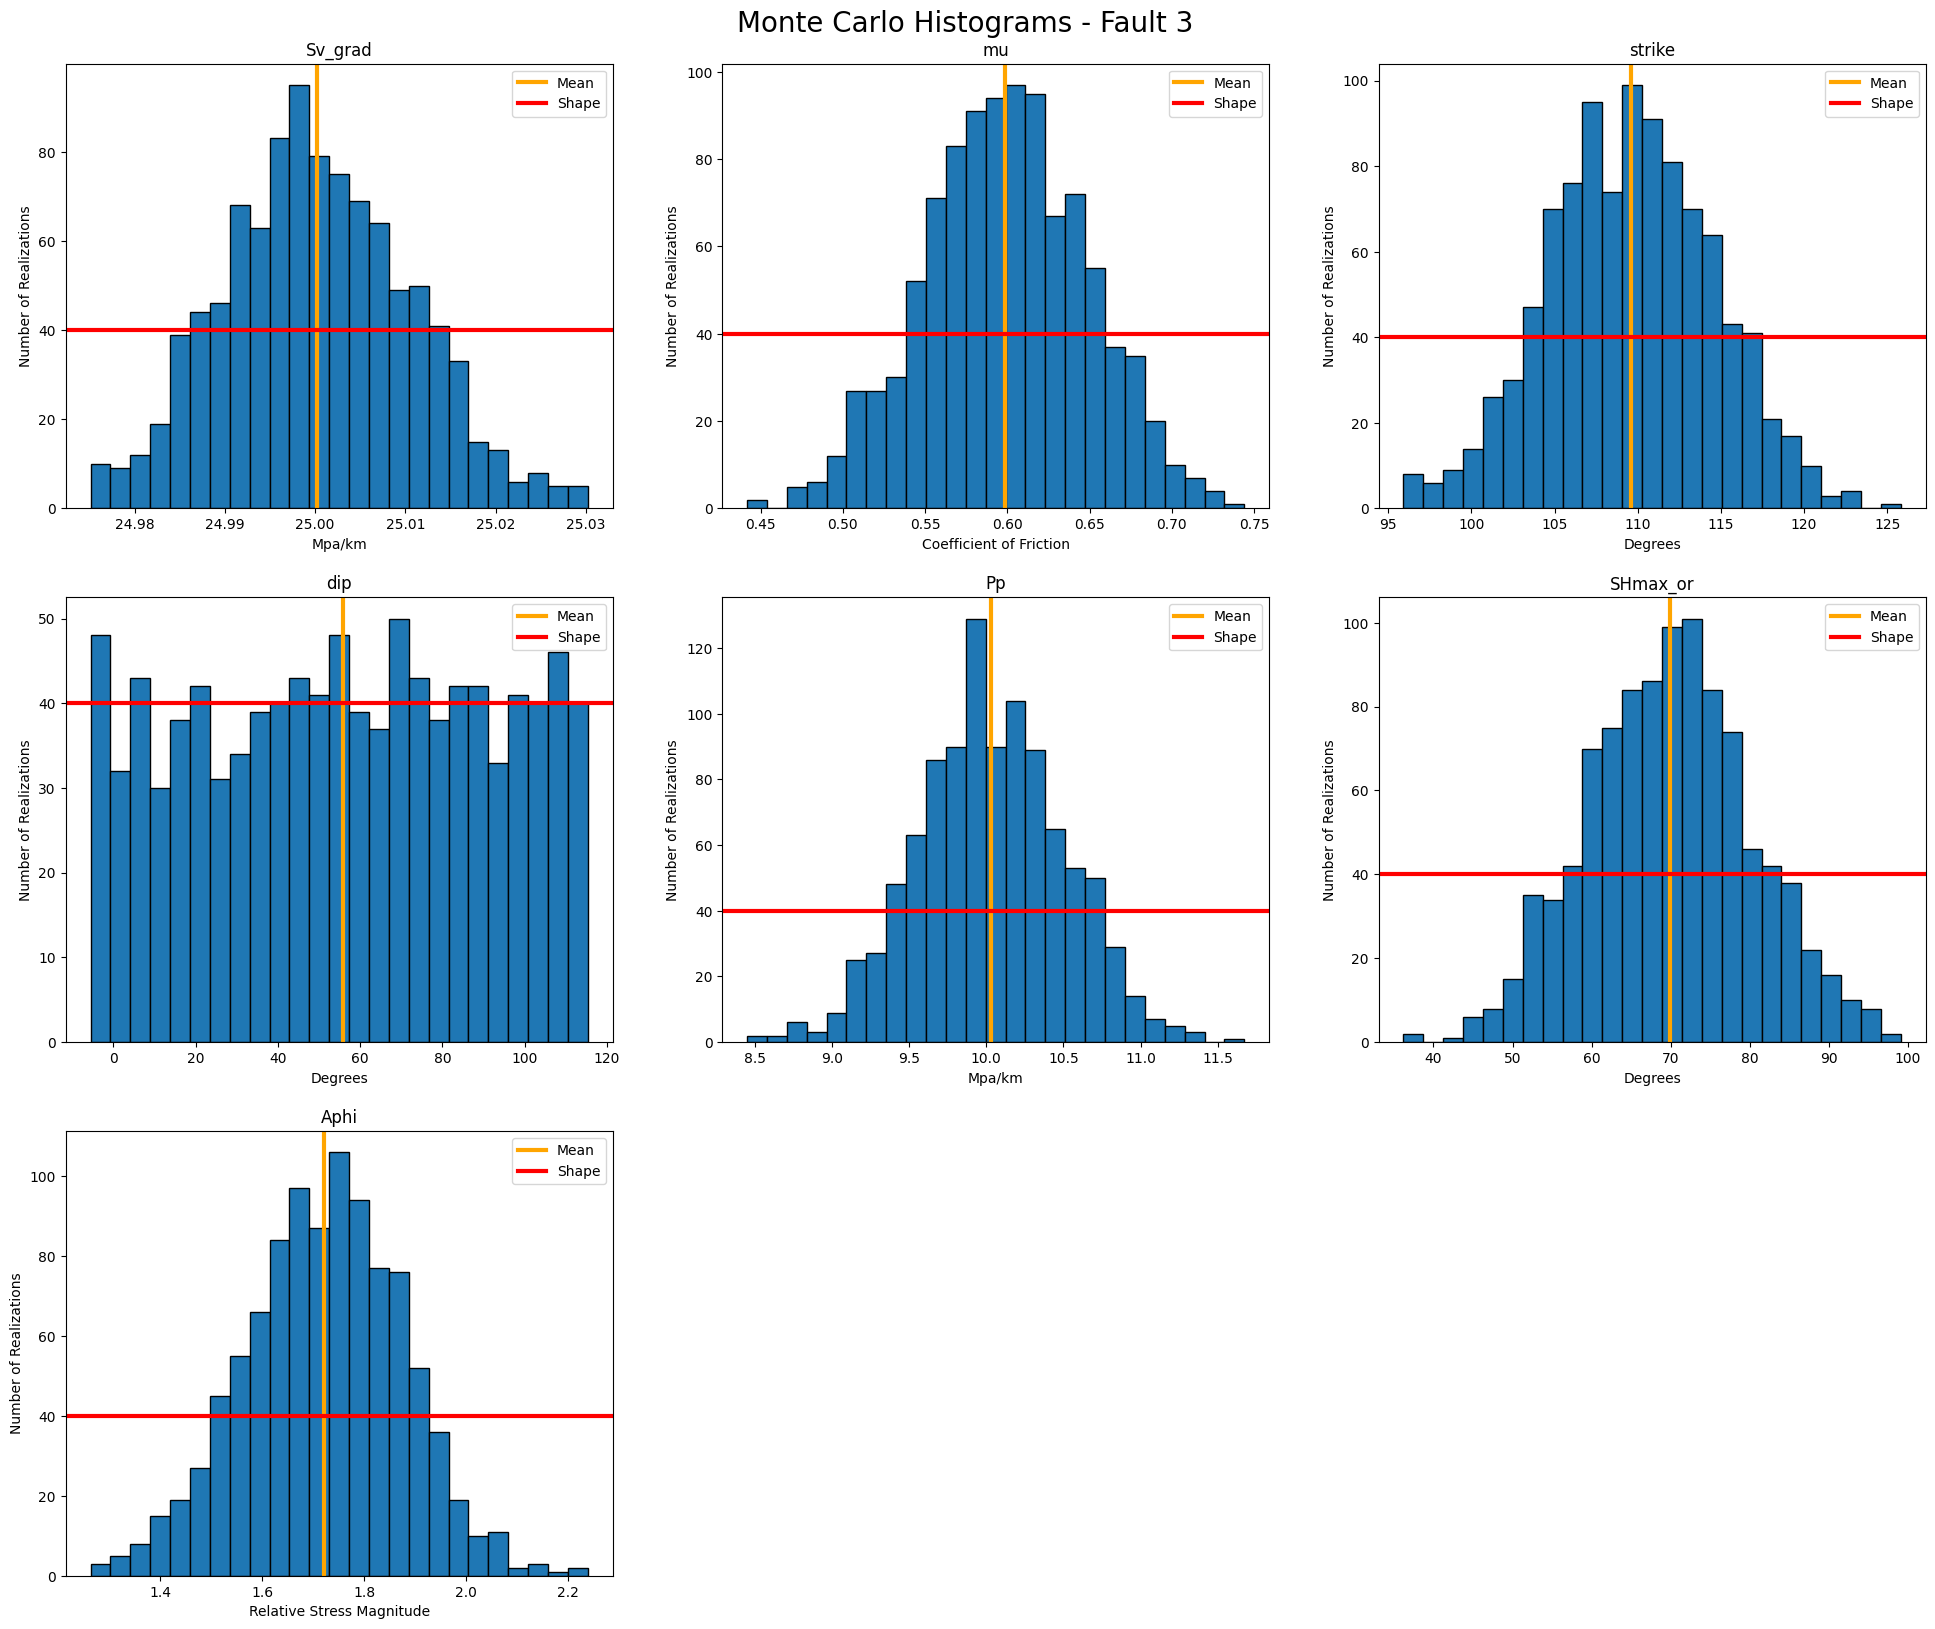

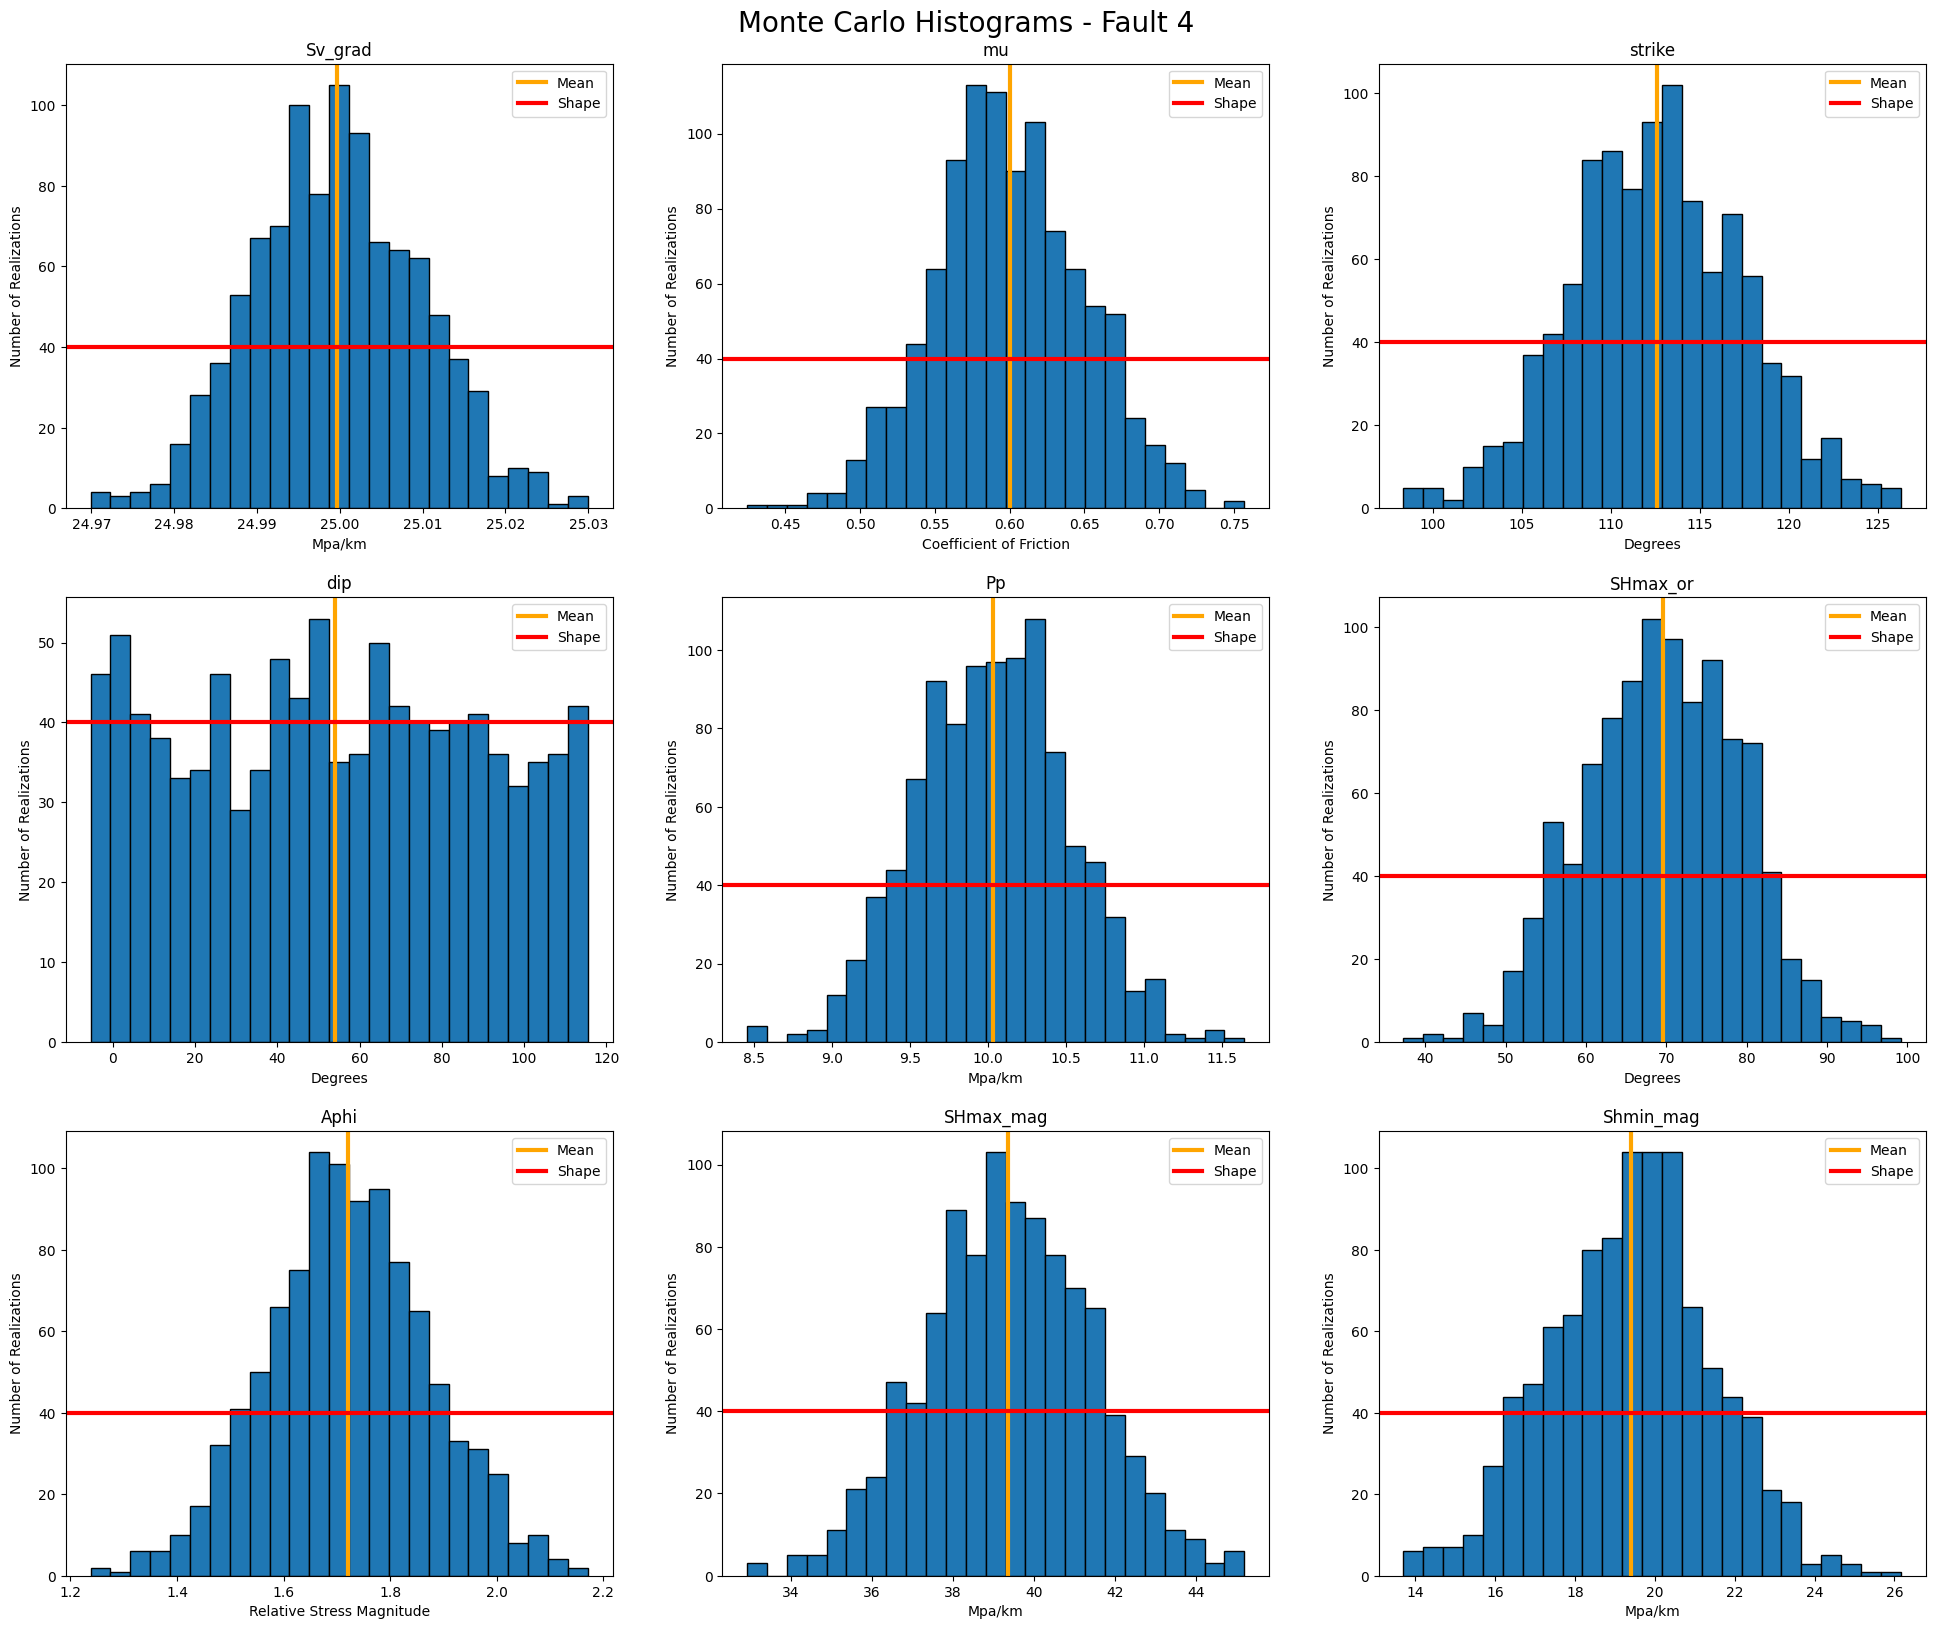

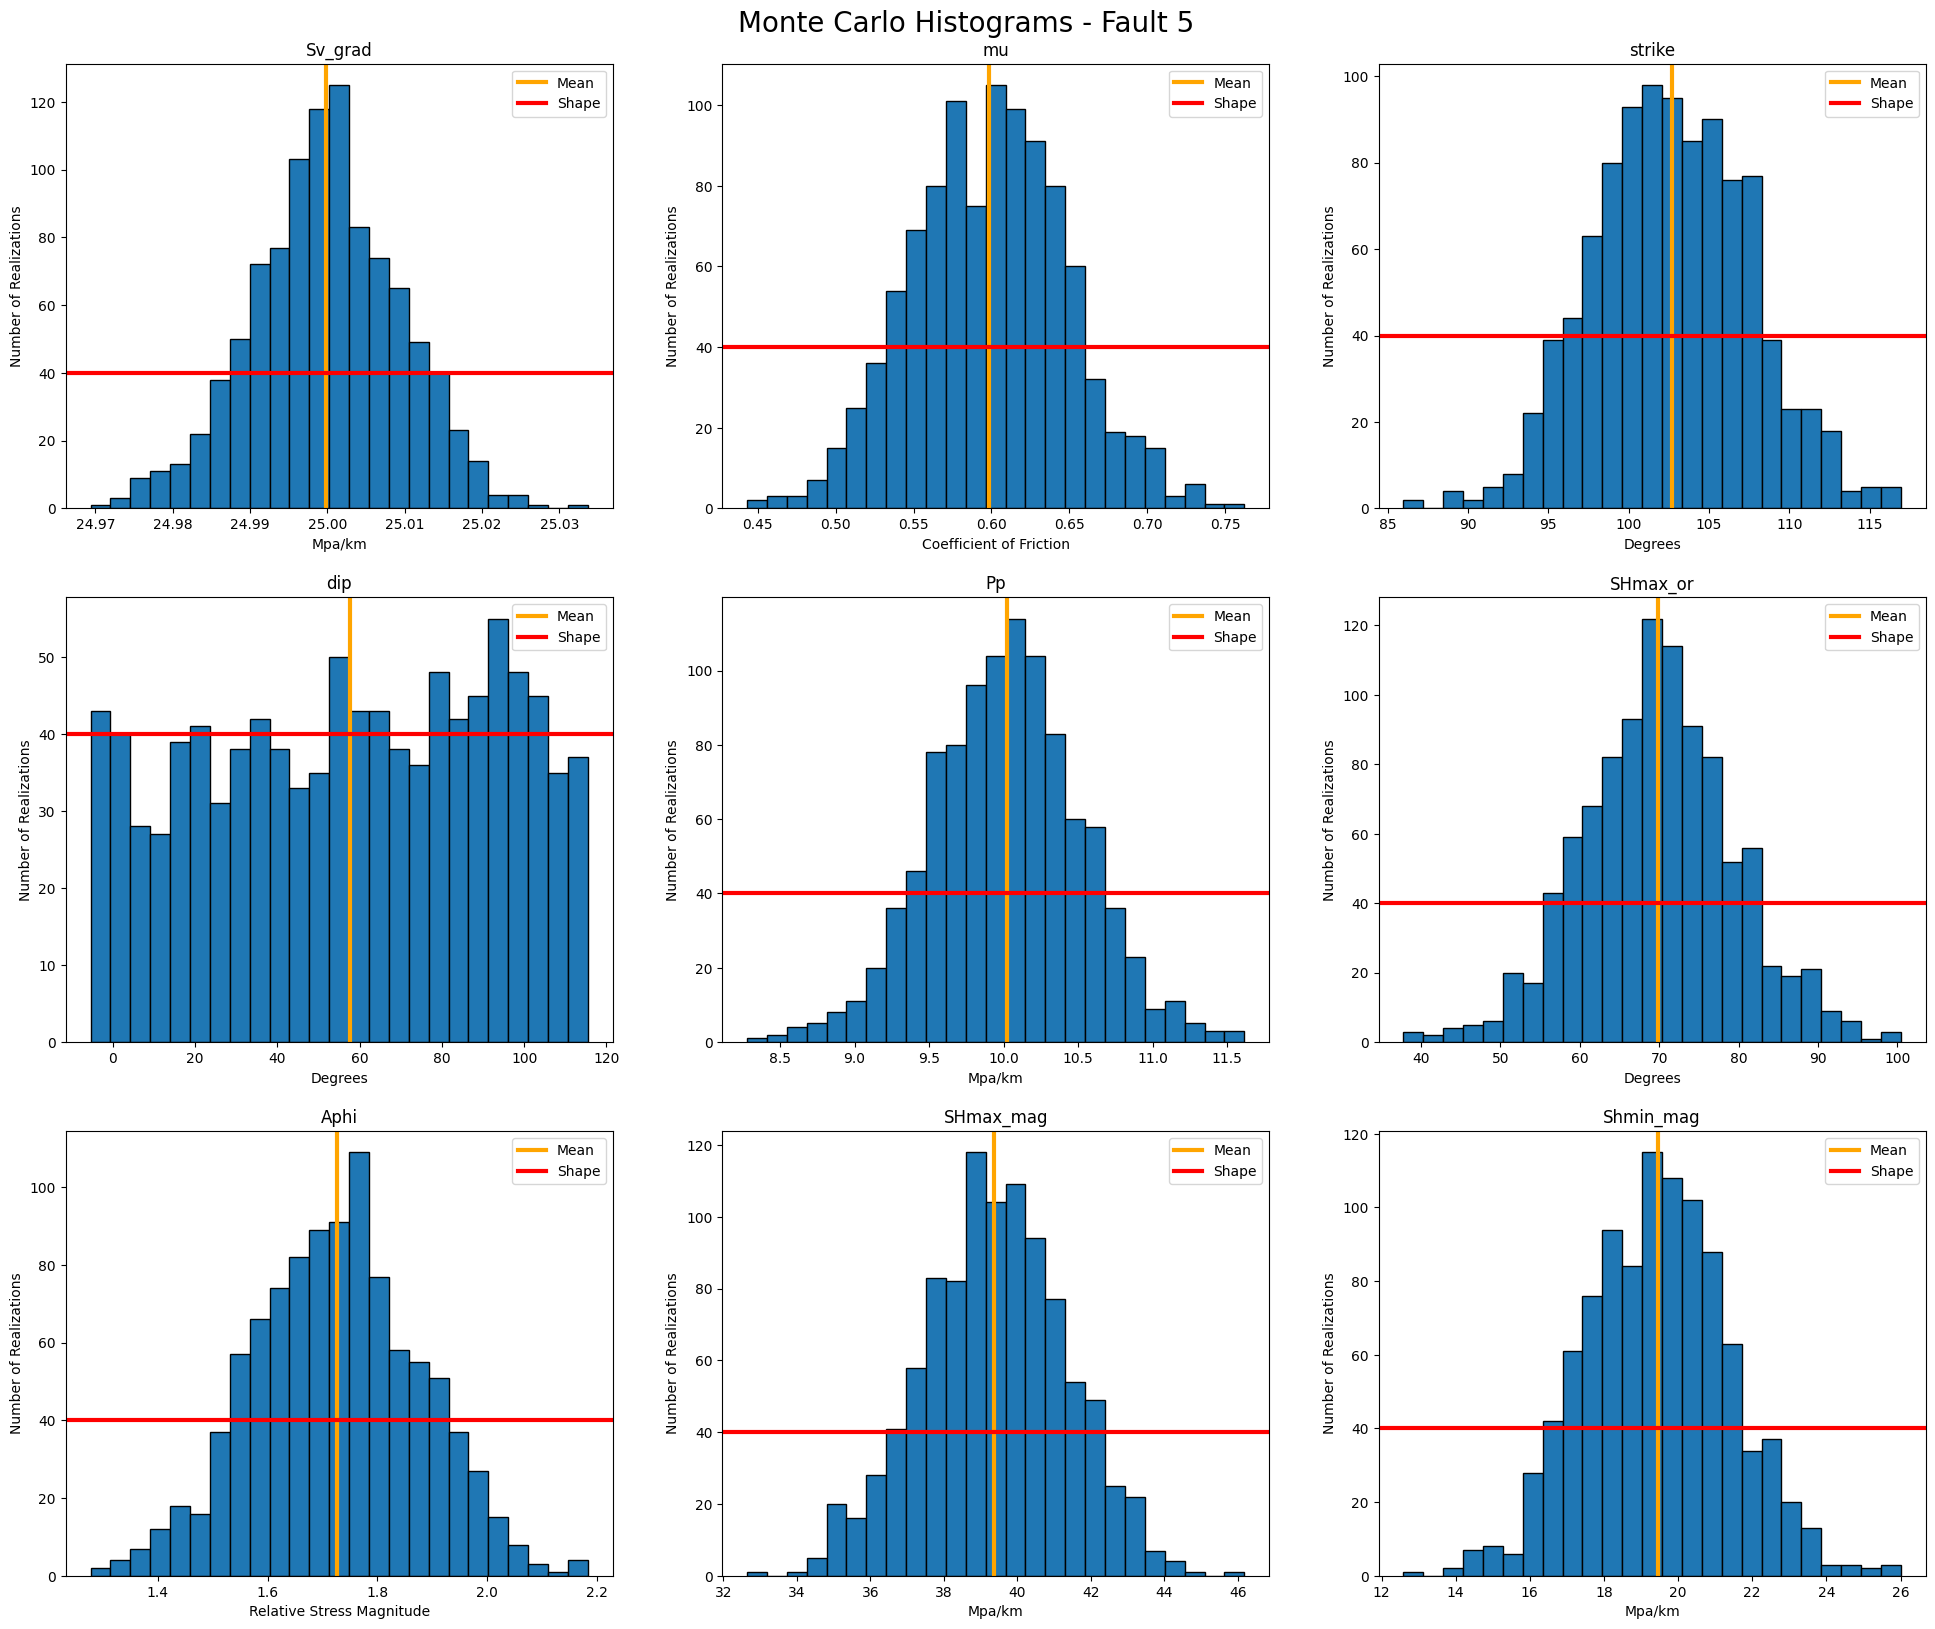

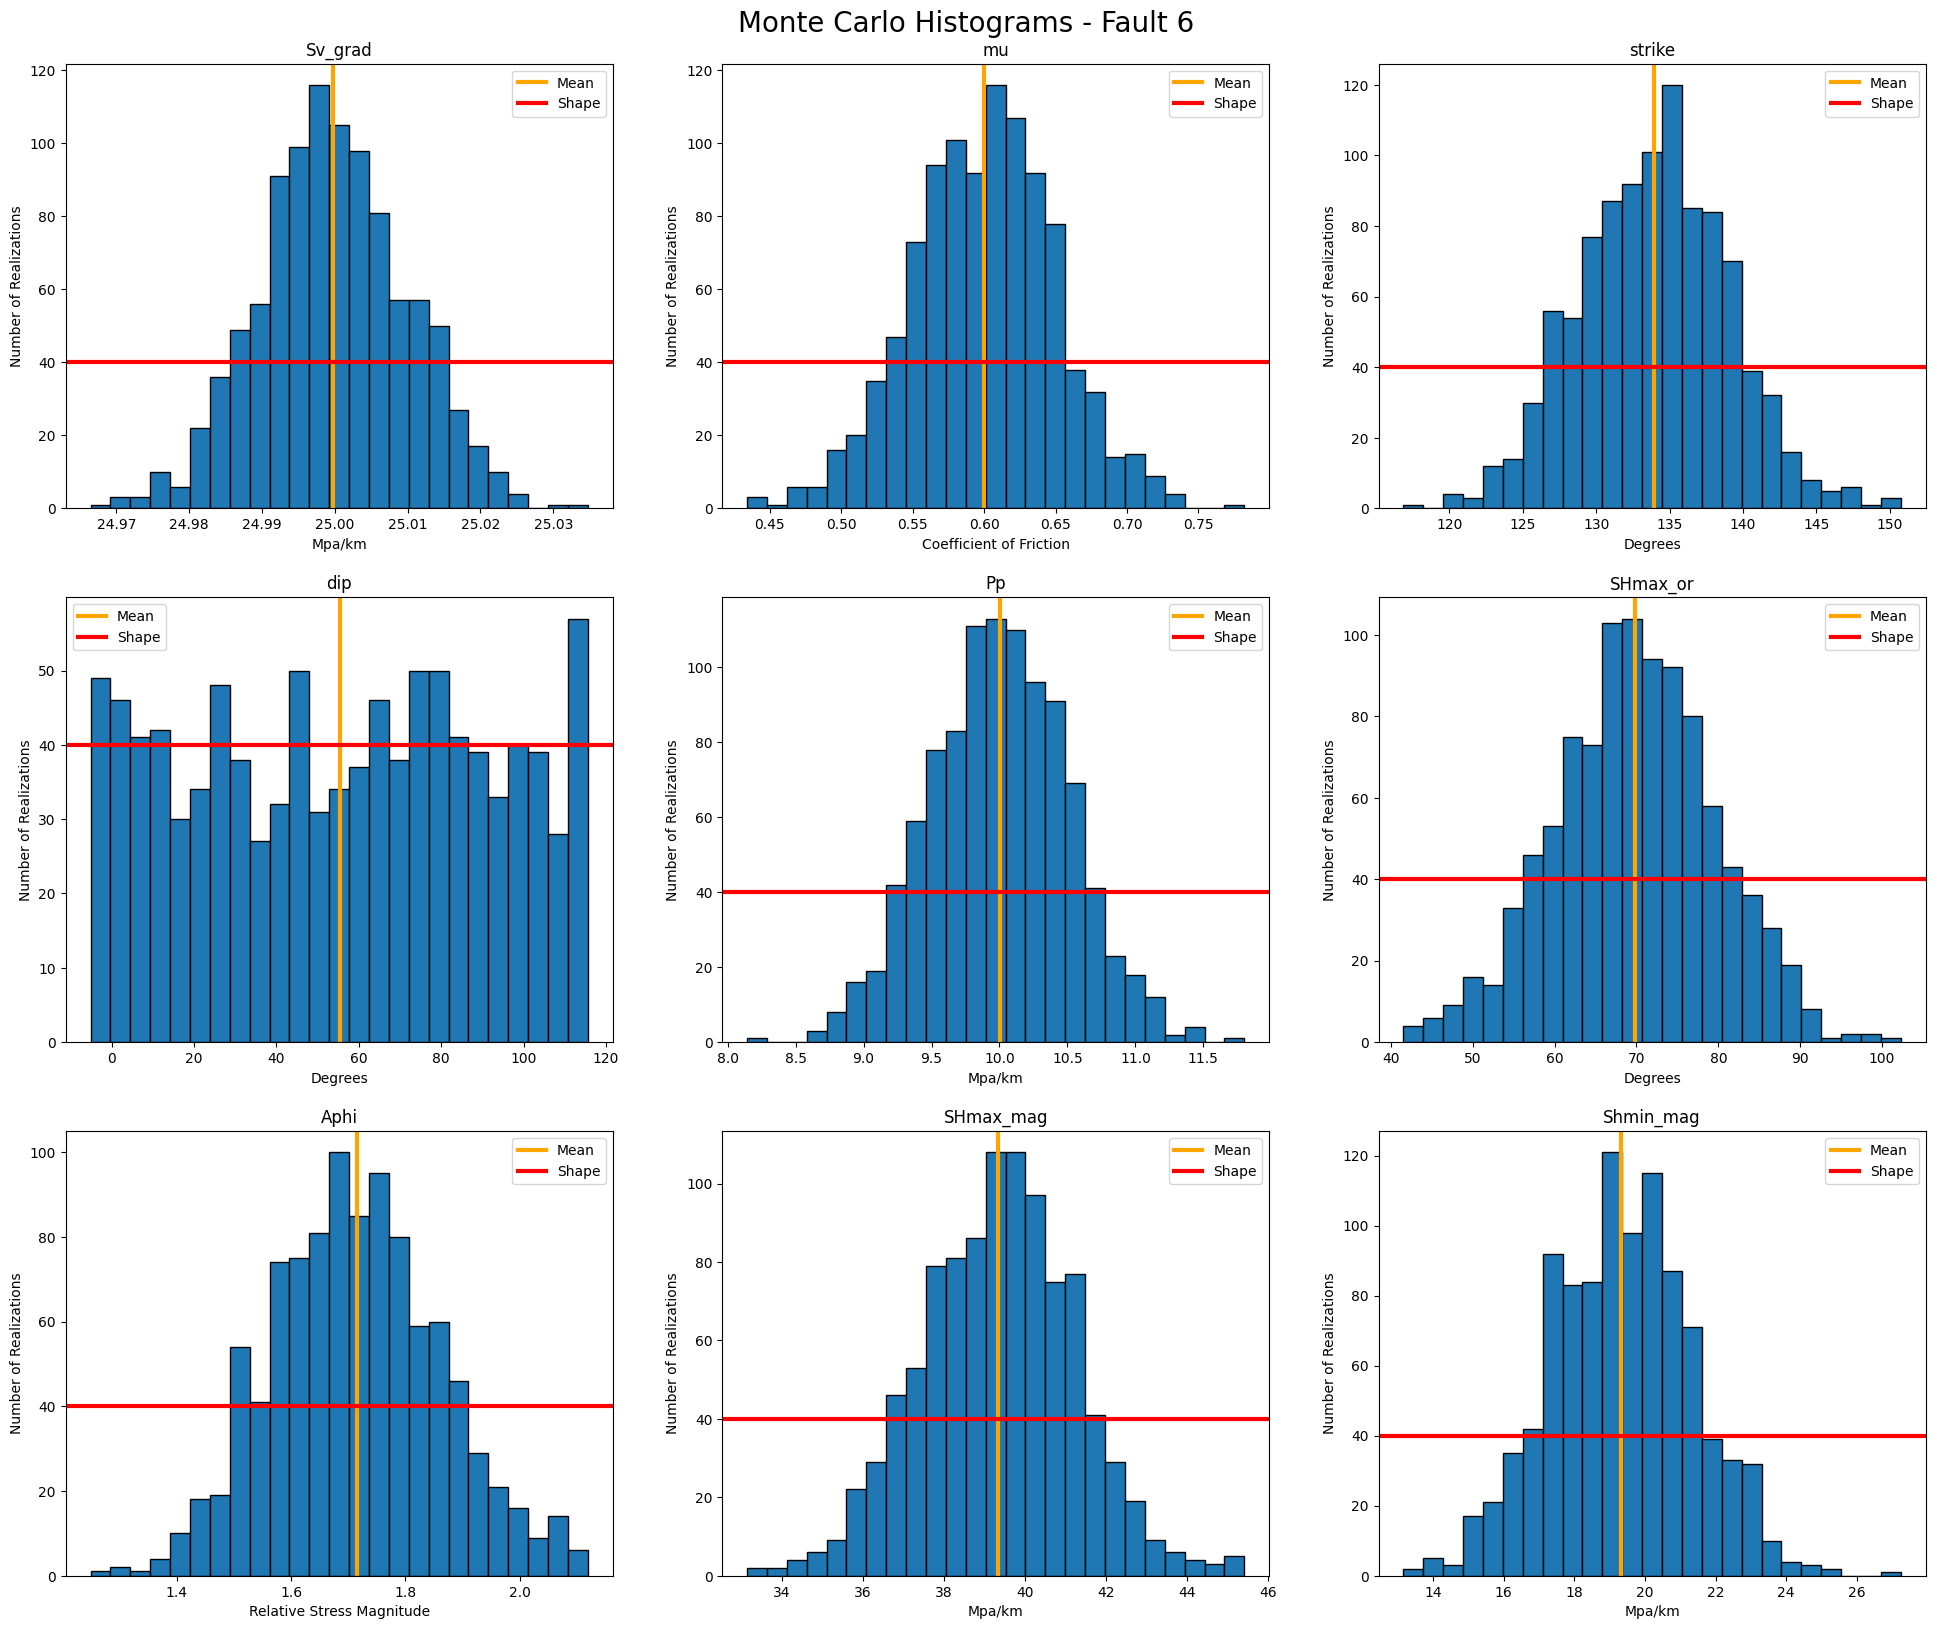

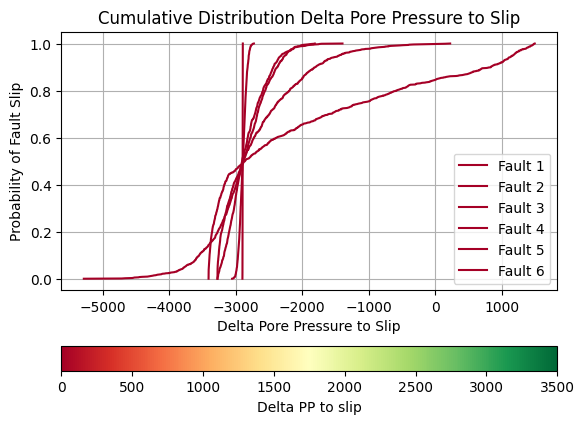

In [5]:
# Call ppfail_MC function
ppfail_MC(variables, dist_params, params_row['units'], nruns=1000, plot=True)